<a href="https://colab.research.google.com/github/Kisame2510/A.I-Training/blob/main/ANN(robot_kinematic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score

from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten,LeakyReLU
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

In [ ]:
data_robot = []
l1 = 50
l2 = 40
#l3 = 20
#phi = theta1 +theta2 + theta3
for theta1 in range (-90,90):
  for theta2 in range (-90,90):
    px = l1*np.cos(np.radians(theta1)) + l2*np.cos(np.radians(theta1 + theta2))
    py = l1*np.sin(np.radians(theta1)) + l2*np.sin(np.radians(theta1 + theta2))
    data_robot.append([theta1,theta2,px,py])
data = pd.DataFrame(data_robot,columns=['theta1','theta2','Px','Py'])
data

,theta1,theta2,Px,Py
0,-90,-90,-40.000000,-50.000000
1,-90,-89,-39.993908,-50.698096
2,-90,-88,-39.975633,-51.395980
3,-90,-87,-39.945181,-52.093438
4,-90,-86,-39.902562,-52.790259
...,...,...,...,...
32395,89,85,-38.908255,54.173523
32396,89,86,-38.975168,53.478614
32397,89,87,-39.029942,52.782644
32398,89,88,-39.072561,52.085823


In [ ]:
Y_df=data.drop(['Px','Py'],axis =1)
X_df=data.drop(['theta1','theta2'],axis =1)
print(X_df.shape,Y_df.shape)

(32400, 2) (32400, 2)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_df,Y_df,test_size=0.25,random_state =7)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
Y_train.head(5)

(24300, 2) (24300, 2) (8100, 2) (8100, 2)


,theta1,theta2
20563,24,-47
5732,-59,62
31971,87,21
31134,82,84
8768,-42,38


In [ ]:
model_rb = Sequential()
model_rb.add(Dense(256,LeakyReLU(), input_shape = (2,)))
model_rb.add(Dense(256,LeakyReLU()))
model_rb.add(Dropout(0.2))
model_rb.add(Dense(256,LeakyReLU()))
model_rb.add(Dense(256,LeakyReLU()))
model_rb.add(Dropout(0.2))
model_rb.add(Dense(256,LeakyReLU()))
model_rb.add(Dense(256,LeakyReLU()))
model_rb.add(Dropout(0.2))
model_rb.add(Dense(256,LeakyReLU()))
model_rb.add(Dense(2))
model_rb.summary()

opt = SGD(lr=0.001,momentum=0.1) #toc do hoc 0.01, momen dong luong 0.9 'Ftrl'
model_rb.compile(loss='mse',optimizer=opt,metrics=['accuracy'])

NameError: ignored

In [ ]:
history=model_rb.fit(X_train,Y_train,batch_size=32,epochs=2,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/2
760/760 [==============================] - 12s 15ms/step - loss: 2697.6057 - accuracy: 0.6395 - val_loss: 2656.7200 - val_accuracy: 0.6178
Epoch 2/2
760/760 [==============================] - 9s 12ms/step - loss: 2697.7598 - accuracy: 0.6383 - val_loss: 2655.1985 - val_accuracy: 0.6309


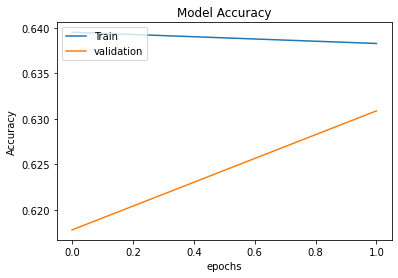

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
model_rb.save('kinematic_2dof.h5')

In [ ]:
model_test=load_model('kinematic_2dof.h5')

In [ ]:
asd = np.array([[50,40],[0,90]])
y_predict = model_test.predict(asd)
print(y_predict)

[[1.000000e+00 3.282257e-20]
 [1.000000e+00 0.000000e+00]]
